In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
sns.set(rc={'figure.figsize':(11.7,8.27)})

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [15]:
heart=pd.read_csv('/Users/humayrajeba/Documents/Research work/heart.csv')

In [16]:
heart.shape

(303, 14)

In [17]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
print(f'number of duplicate rows: {heart.duplicated().sum()}\nnumber of null values:\n{hea.isna().sum()}')

NameError: name 'hea' is not defined

In [ ]:
heart.loc[heart.duplicated(), :]

In [ ]:
heart.isnull().sum()/len(heart)*100

In [ ]:
heart.info()

In [20]:
heart[heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [21]:
heart.drop_duplicates(keep='first',inplace=True)

In [22]:
heart.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Number of people having sex as 1 are 96 and Number of people having sex as 0 are 206
People having gender as 0 are more than twice the people having gender as 1


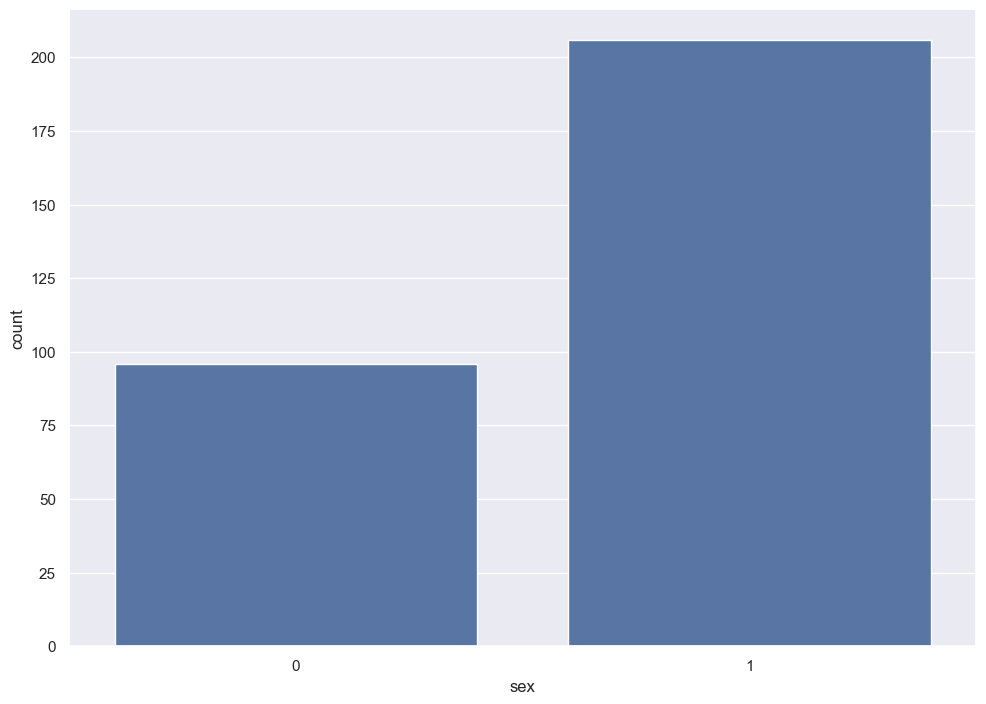

In [23]:
# Breakdown of gender
x=(heart.sex.value_counts())
print(f'Number of people having sex as 1 are {x[0]} and Number of people having sex as 0 are {x[1]}')
print(f'People having gender as 0 are more than twice the people having gender as 1')
p = sns.countplot(data=heart, x="sex")
plt.show()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64


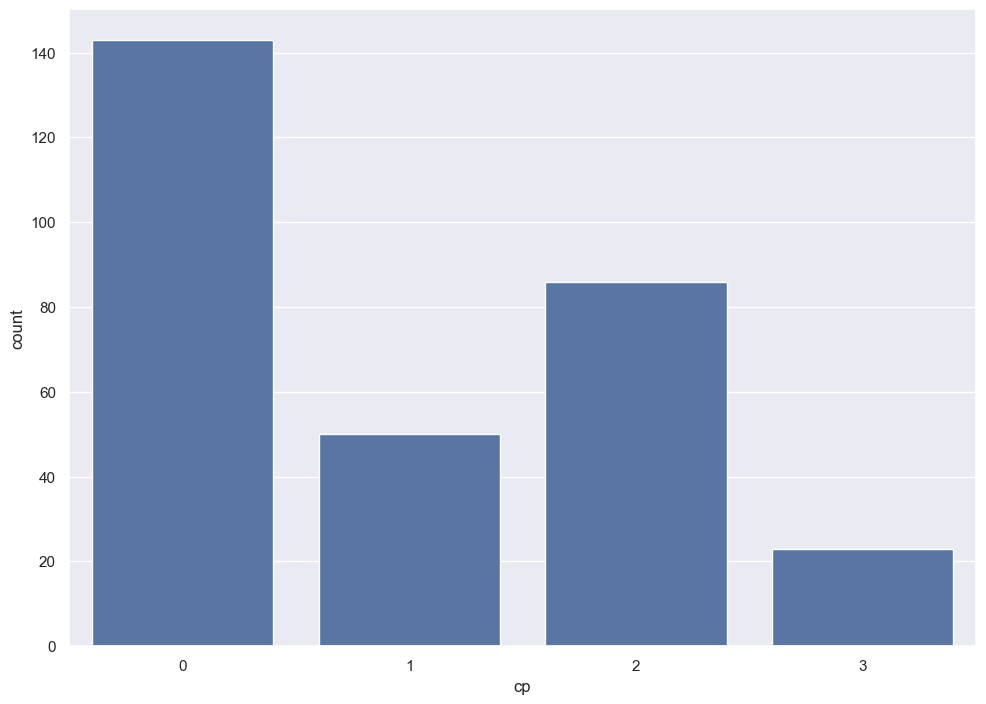

In [24]:
# Breakdown for chest pain
x=(heart.cp.value_counts())
print(x)
p = sns.countplot(data=heart, x="cp")
plt.show()

fbs
0    257
1     45
Name: count, dtype: int64


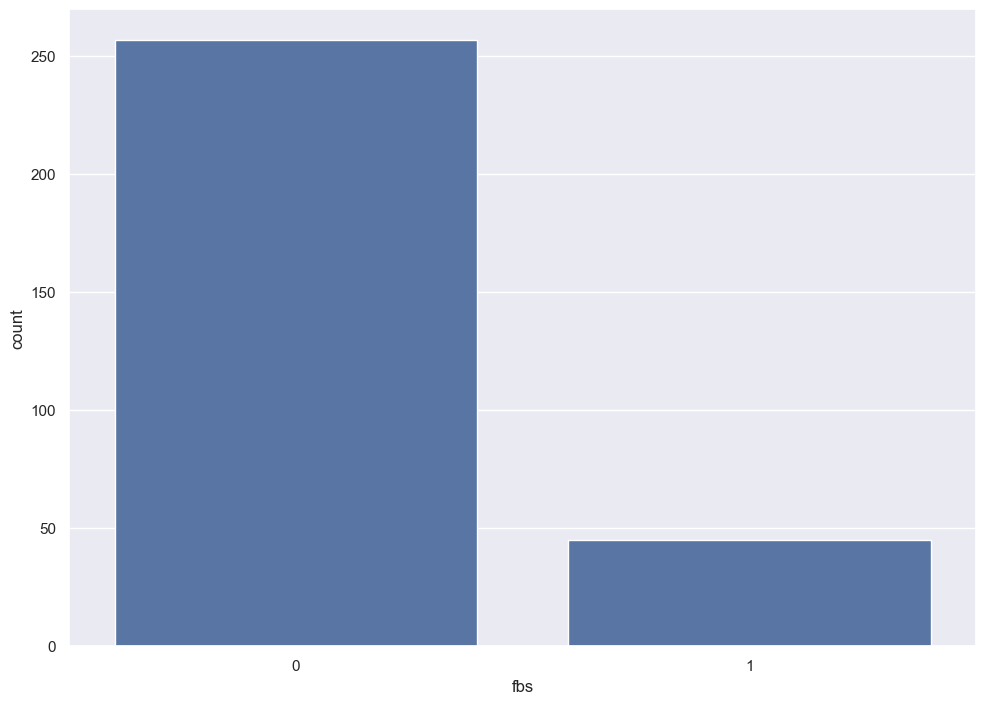

In [25]:
#Breakdown of FBS
x=(heart.fbs.value_counts())
print(x)
p = sns.countplot(data=heart, x="fbs")
plt.show()

restecg
1    151
0    147
2      4
Name: count, dtype: int64


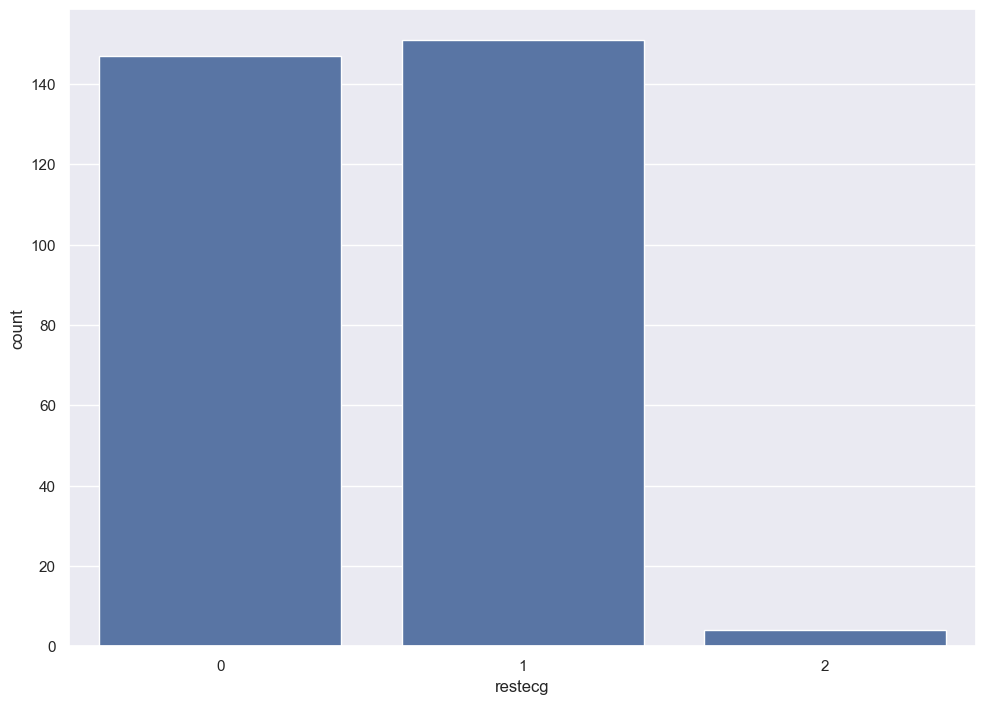

In [26]:
#Breakdown of ECG
x=(heart.restecg.value_counts())
print(x)
p = sns.countplot(data=heart, x="restecg")
plt.show()

exng
0    203
1     99
Name: count, dtype: int64


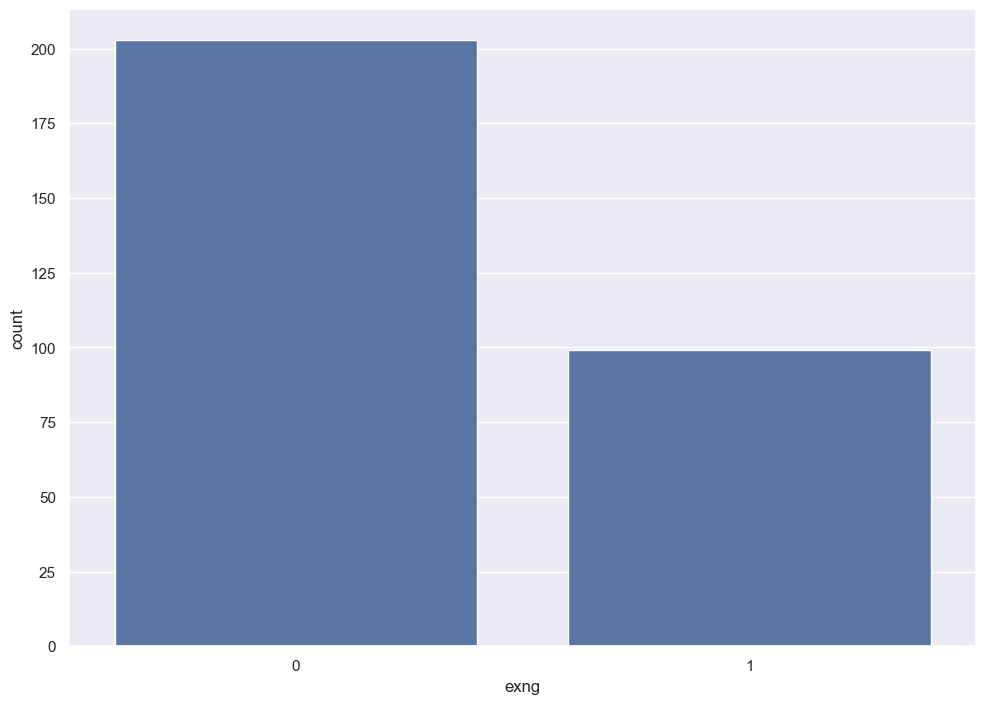

In [27]:
#Breakdown for Exercise Induced Angina
x=(heart.exng.value_counts())
print(x)
p = sns.countplot(data=heart, x="exng")
plt.show()

thall
2    165
3    117
1     18
0      2
Name: count, dtype: int64


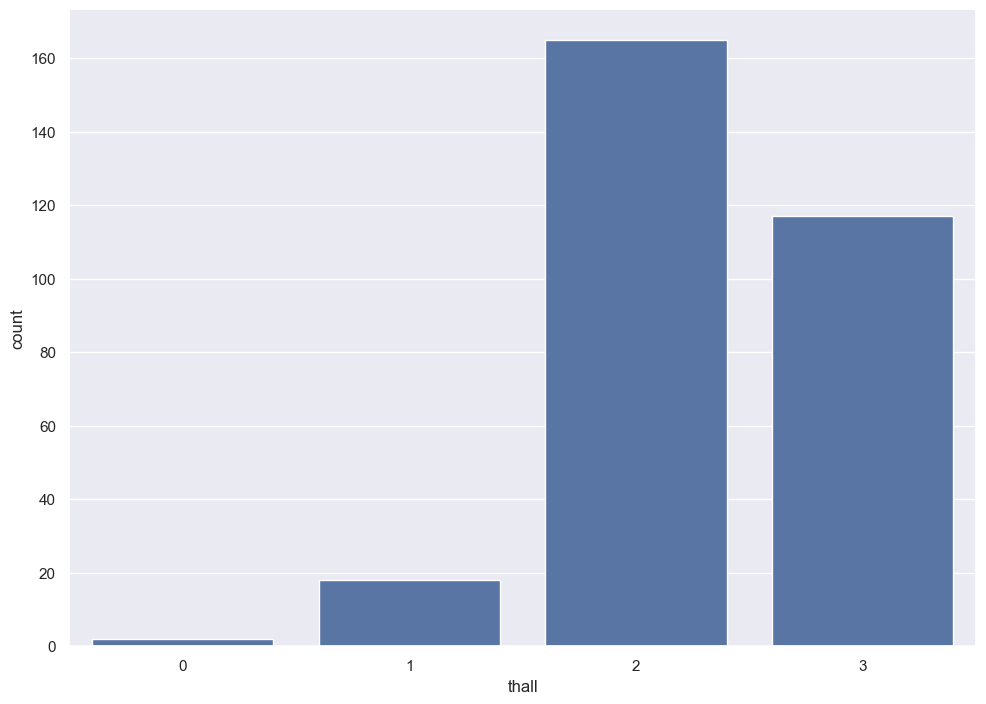

In [28]:
#Breakdown for Thalium Stress Test
x=(heart.thall.value_counts())
print(x)
p = sns.countplot(data=heart, x="thall")
plt.show()

<Figure size 1000x1000 with 0 Axes>

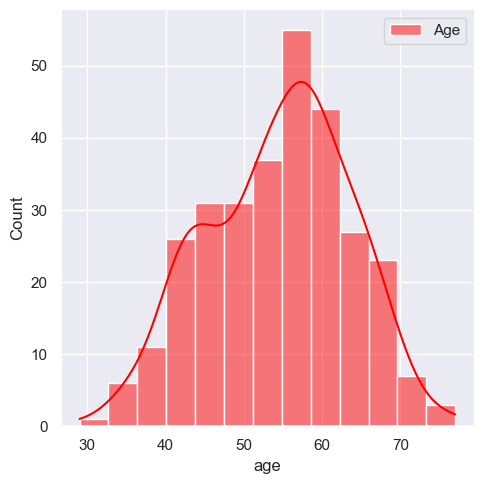

In [29]:
#Density distribution for Age
plt.figure(figsize=(10,10))
sns.displot(heart.age, color="red", label="Age", kde= True)
plt.legend()

<Figure size 2000x2000 with 0 Axes>

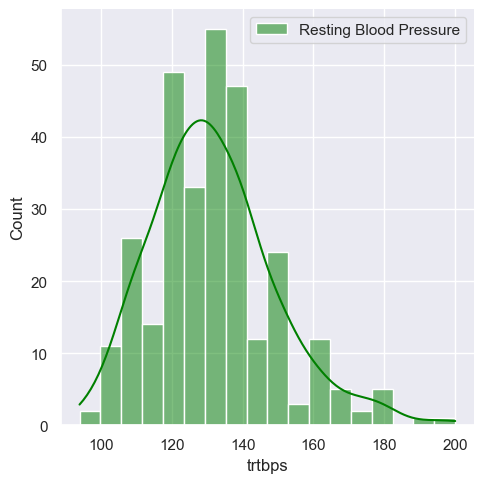

In [30]:
#Density distribution is highest for age group 55 to 60
plt.figure(figsize=(20,20))
sns.displot(heart.trtbps , color="green", label="Resting Blood Pressure", kde= True)
plt.legend()

/var/folders/2r/p_w4swwd3cv52b3h9nn1njtm0000gn/T/ipykernel_1810/620154619.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["age"], color='green',kde=True,)
/var/folders/2r/p_w4swwd3cv52b3h9nn1njtm0000gn/T/ipykernel_1810/620154619.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

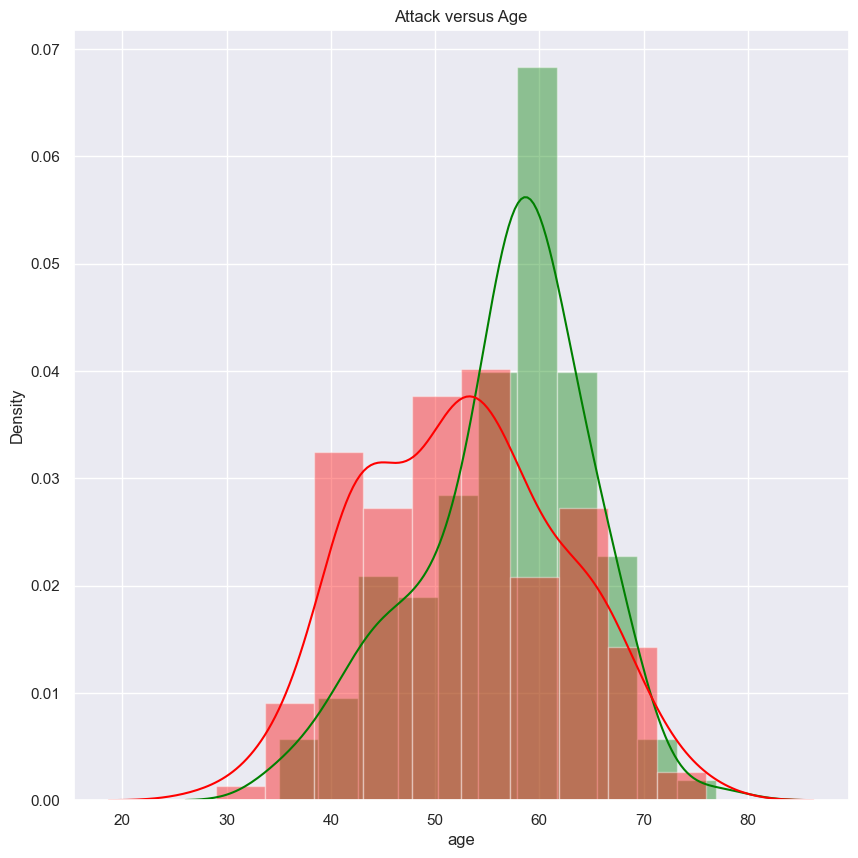

In [31]:
#Heart Attack Vs Age
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["age"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()

/var/folders/2r/p_w4swwd3cv52b3h9nn1njtm0000gn/T/ipykernel_1810/1917866329.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["chol"], color='green',kde=True,)
/var/folders/2r/p_w4swwd3cv52b3h9nn1njtm0000gn/T/ipykernel_1810/1917866329.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

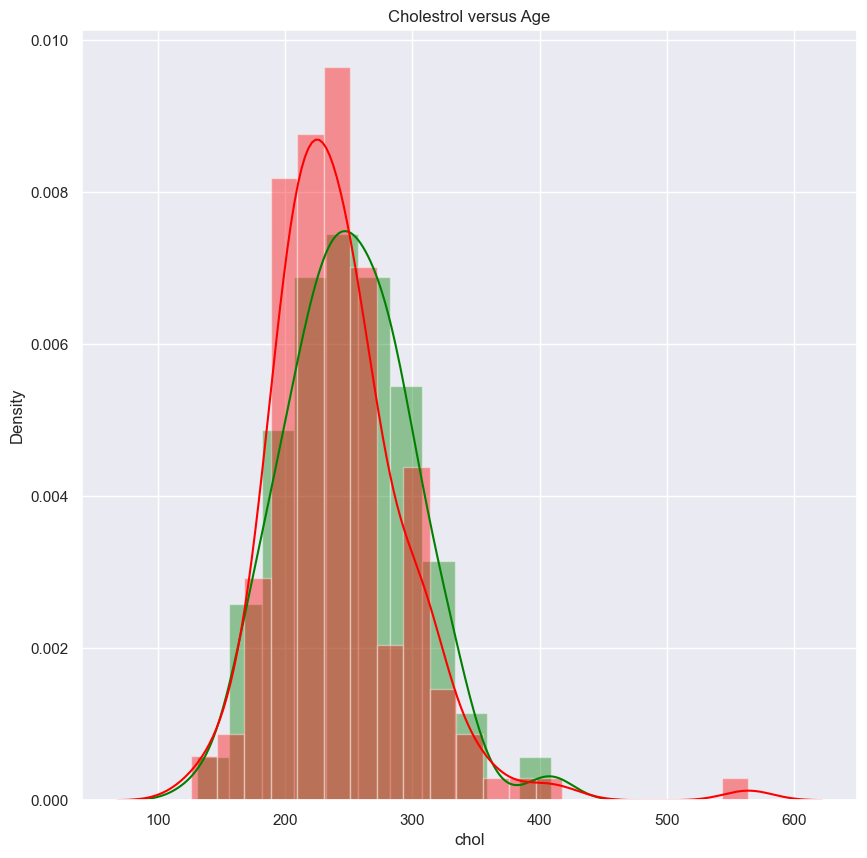

In [32]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["chol"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["chol"], color='red',kde=True)
plt.title('Cholestrol versus Age')
plt.show()

/var/folders/2r/p_w4swwd3cv52b3h9nn1njtm0000gn/T/ipykernel_1810/660625130.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["trtbps"], color='green',kde=True,)
/var/folders/2r/p_w4swwd3cv52b3h9nn1njtm0000gn/T/ipykernel_1810/660625130.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

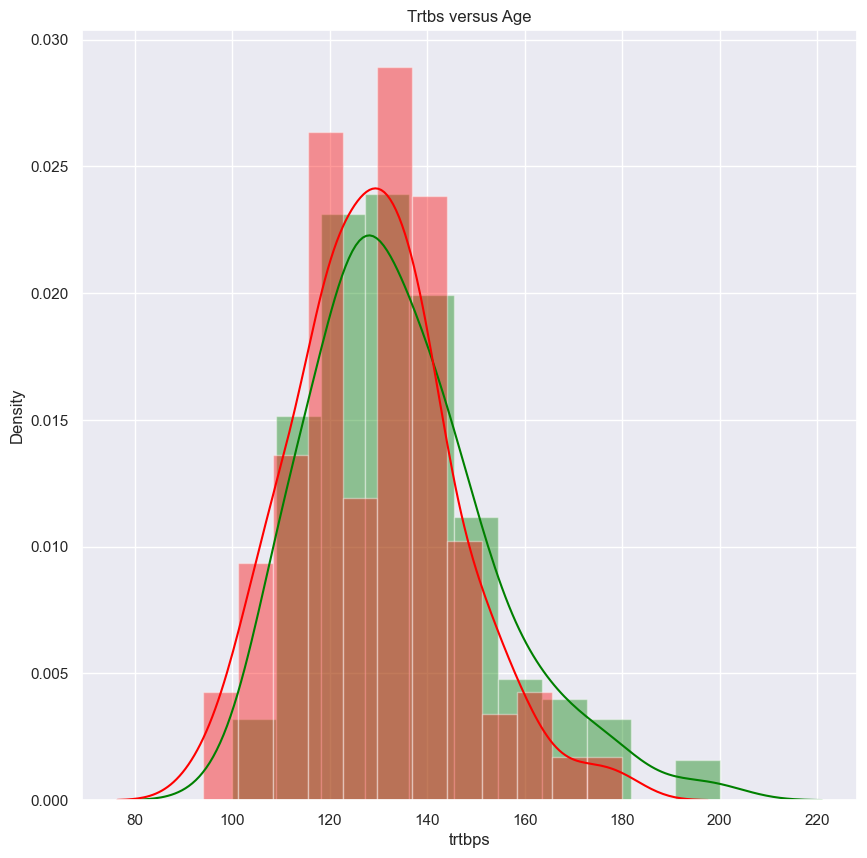

In [33]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["trtbps"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["trtbps"], color='red',kde=True)
plt.title('Trtbs versus Age')
plt.show()

/var/folders/2r/p_w4swwd3cv52b3h9nn1njtm0000gn/T/ipykernel_1810/3875911245.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["thalachh"], color='green',kde=True,)
/var/folders/2r/p_w4swwd3cv52b3h9nn1njtm0000gn/T/ipykernel_1810/3875911245.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

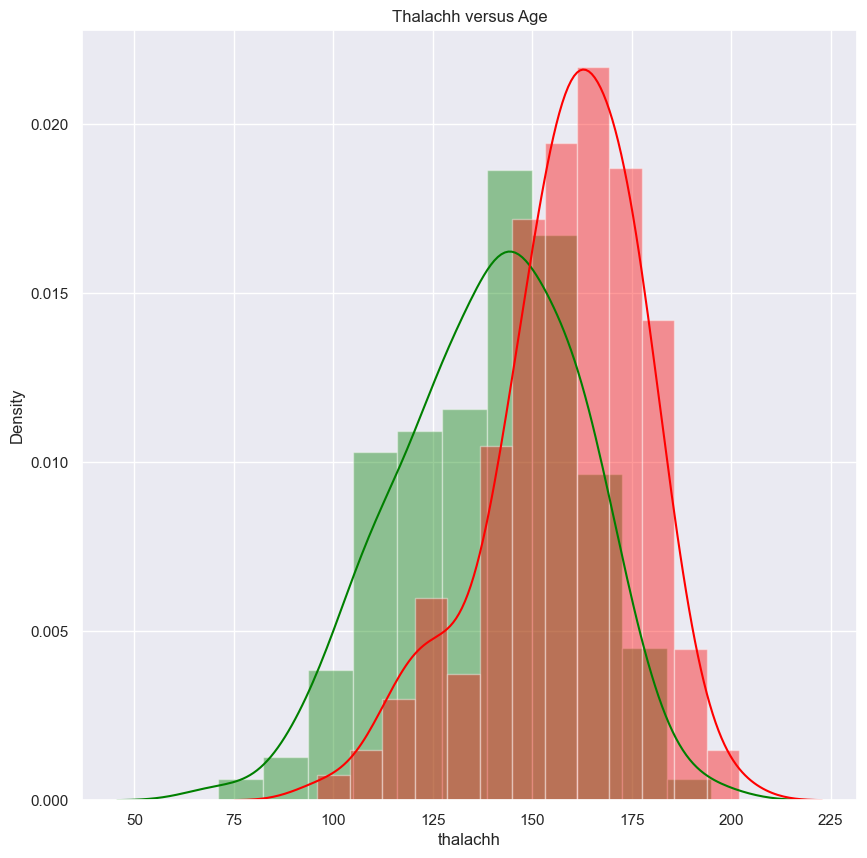

In [34]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["thalachh"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Thalachh versus Age')
plt.show()

<Figure size 2000x2000 with 0 Axes>

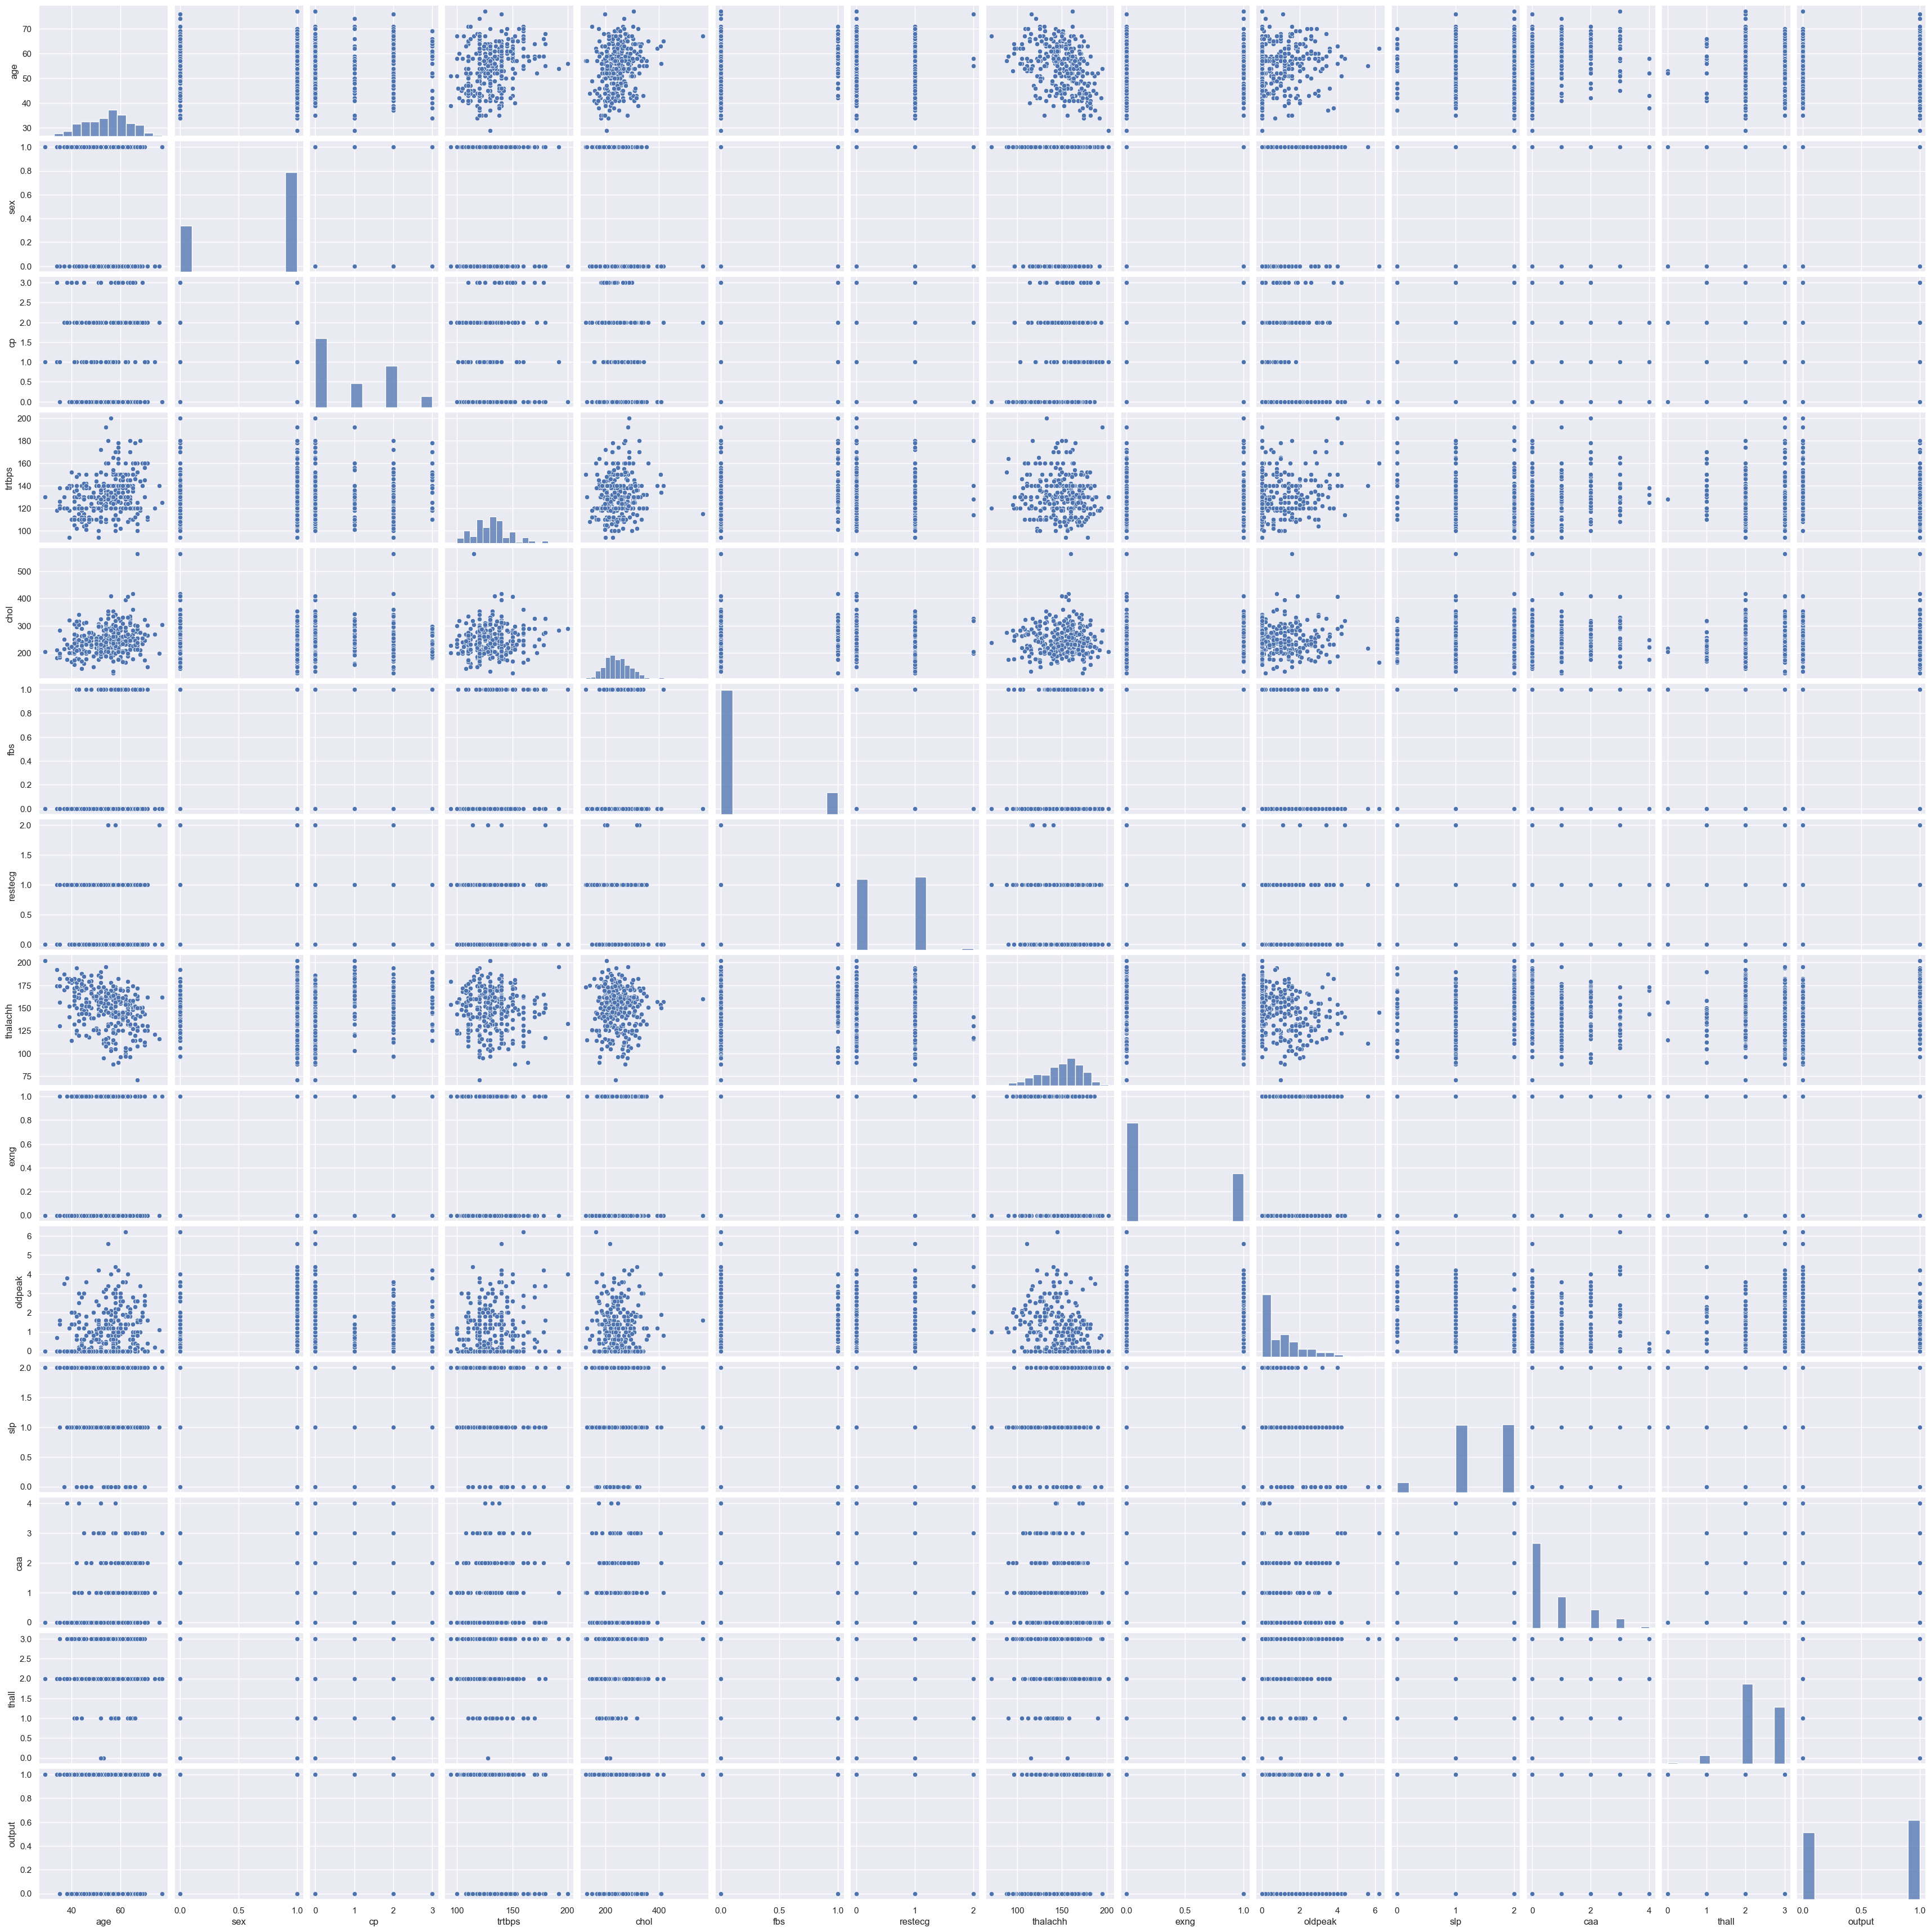

In [35]:
#pair plot
plt.figure(figsize=(20,20))
sns.pairplot(heart)
plt.show()

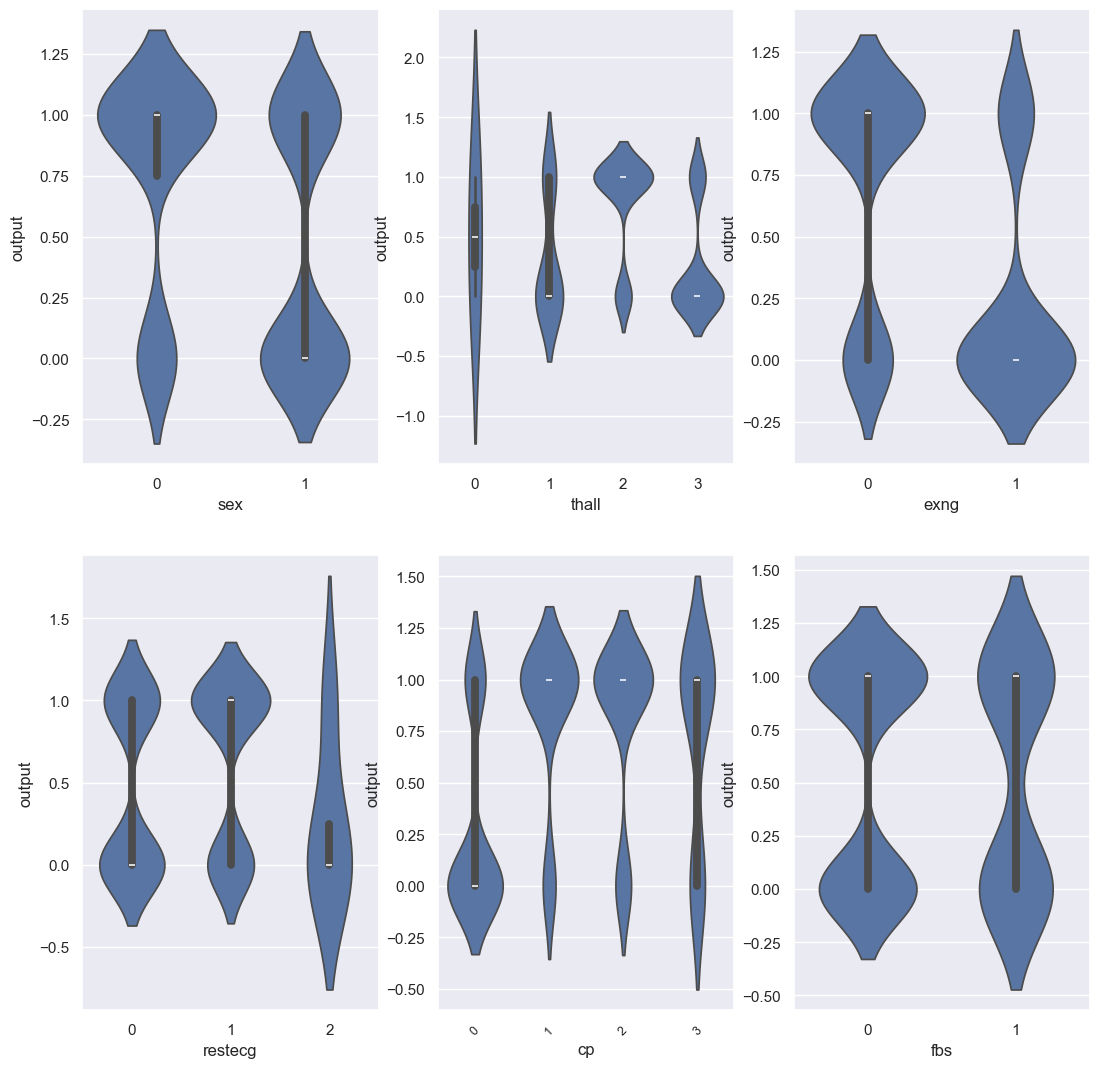

In [36]:
plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'output', data = heart)
plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'output', data = heart)
plt.subplot(2,3,3)
sns.violinplot(x = 'exng', y = 'output', data = heart)
plt.subplot(2,3,4)
sns.violinplot(x = 'restecg', y = 'output', data = heart)
plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'output', data = heart)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'fbs', y = 'output', data = heart)

plt.show()

In [37]:
#Data preprocessing
x = heart.iloc[:, 1:-1].values
y = heart.iloc[:, -1].values
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

In [38]:
# Splitting the dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (241, 12) (241,)
Shape for testing data (61, 12) (61,)


In [39]:
#Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train,x_test

(array([[-1.4186261 ,  0.98544689, -0.55988902, ..., -0.61492051,
         -0.70674006, -0.49876142],
        [-1.4186261 ,  0.98544689,  0.81698091, ..., -0.61492051,
          0.29516791, -0.49876142],
        [ 0.70490738,  0.98544689,  0.47276343, ...,  0.99590387,
         -0.70674006, -0.49876142],
        ...,
        [ 0.70490738,  1.94307874, -0.67462818, ..., -0.61492051,
         -0.70674006,  1.1478345 ],
        [ 0.70490738,  0.98544689,  0.35802427, ...,  0.99590387,
         -0.70674006, -0.49876142],
        [ 0.70490738,  0.98544689,  0.01380679, ...,  0.99590387,
          1.29707587,  1.1478345 ]]),
 array([[ 0.70490738,  0.02781503, -0.67462818,  0.65089023, -0.40527917,
         -0.97525383, -1.96657306, -0.6983225 ,  0.27236593, -0.61492051,
          0.29516791,  1.1478345 ],
        [ 0.70490738,  1.94307874,  2.19385084, -0.36856884, -0.40527917,
         -0.97525383,  0.23525787, -0.6983225 , -0.39657867, -0.61492051,
         -0.70674006,  1.1478345 ],
     

In [40]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[23  4]
 [ 3 31]]


The accuracy of Logistic Regression is :  88.52459016393442 %


In [41]:
# Gaussian Naive Bayes
model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  88.52459016393442 %


In [42]:
# Bernoulli Naive Bayes
model = BernoulliNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  86.88524590163934 %


In [43]:
# Support Vector Machine
model = SVC()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of SVM is :  91.80327868852459 %


In [44]:
# Random Forest
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  85.24590163934425 %


In [45]:
# K Nearest Neighbours
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  

print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")


[[23  4]
 [ 6 28]]
The accuracy of KNN is :  83.60655737704919 %


Text(0, 0.5, 'Error Rate')

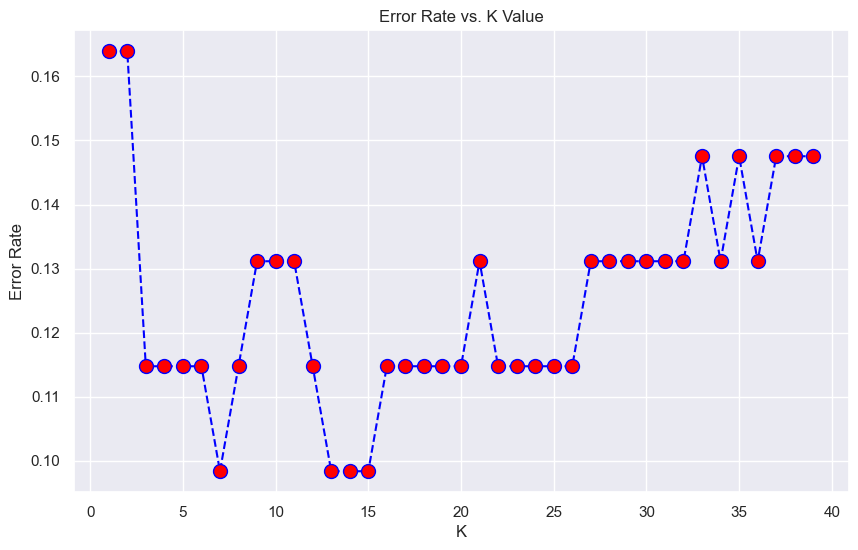

In [46]:
# Optimizing the KNN
error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
# With k=7 as it hovers after that
model = KNeighborsClassifier(n_neighbors = 7)
  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

Confusion Matrix :
[[25  2]
 [ 4 30]]


The accuracy of KNN is :  90.1639344262295 %


In [50]:
# X Gradient Boosting
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
   
predicted = model.predict(x_test)
   
cm = confusion_matrix(y_test, predicted)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")


The accuracy of X Gradient Boosting is :  81.9672131147541 %


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:20:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Axes: >

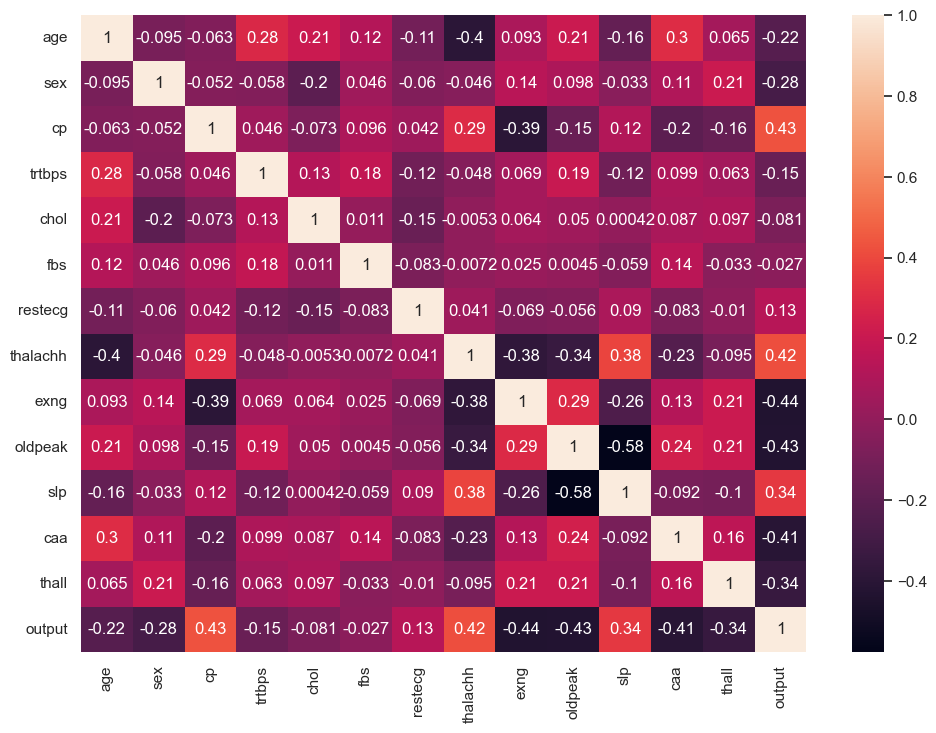

In [51]:
#Most of the models are performing really well.
#SVM is performing the best for the given dataset.
sns.heatmap(heart.corr(),annot=True)

In [57]:
import numpy as np

# Create a correlation matrix
corr_matrix = heart.corr().abs()

# Find pairs of features with correlation above a certain threshold
threshold = 0.4
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            rowname = corr_matrix.index[j]
            high_corr_pairs.append((rowname, colname, corr_matrix.iloc[i, j]))

# Check if there are any highly correlated pairs
if len(high_corr_pairs) > 0:
    print("Highly correlated pairs:")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
else:
    print("No pairs of features with correlation above the threshold.")

Highly correlated pairs:
oldpeak and slp: 0.58
cp and output: 0.43
thalachh and output: 0.42
exng and output: 0.44
oldpeak and output: 0.43
caa and output: 0.41


In [66]:
# Features identified for potential removal based on high correlation
to_drop = ['slp', 'output', 'output', 'output', 'output', 'output']

# Dropping the identified features
heart_reduced = heart.drop(columns=to_drop)

# Display the remaining features
print("Remaining features after removing highly correlated ones:")
print(heart_reduced.columns)

Remaining features after removing highly correlated ones:
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'caa', 'thall'],
      dtype='object')


In [62]:
# List of features to drop (based on the output of the previous step)
features_to_drop = ['oldpeak', 'exng']  # replace with actual feature names

# Drop the selected features
x = heart.drop(columns=features_to_drop).iloc[:, 1:-1].values
y = heart.iloc[:, -1].values

# Proceed with train-test split and model training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [64]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict and evaluate
predicted = model.predict(x_test)
print(f"Accuracy of Logistic Regression after feature selection: {accuracy_score(y_test, predicted) * 100:.2f}%")


Accuracy of Logistic Regression after feature selection: 88.52%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
